# LaLiga Player Performance Analysis

Bu layihədə LaLiga oyunçularının mövqe, oyun vaxtı və performans statistikaları
Pandas istifadə edilərək analiz edilmişdir.


In [ ]:
import pandas as pd

laliga = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/laliga.csv')


Bu mərhələdə LaLiga oyunçularına aid CSV faylı Pandas ilə oxunur.
Sonrakı addımlarda analiz üçün əsas dataframe yaradılır.

In [ ]:
laliga.head()

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,0.00%,0,0.00%,0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.0,457.0,78,1,0


In [ ]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

Dataset-in ilk sətrlərinə və ümumi strukturuna baxılır.
Burada sütun adları, data tipləri və boş dəyərlər müəyyən edilir.



In [ ]:
laliga = laliga[laliga['Games played']>0]
laliga

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,0,25,6,19,887.000,128.000,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,0,3,2,1,155.000,49.000,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,0,15,107,38,69,536.000,457.000,78,1,0
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,...,0,53,329,162,167,1.440,1.074,361,5,0
6,Athletic Club,Defender,5.0,Yeray,2.614,30,79.00%,28,74.00%,30,...,0,55,296,126,170,1.284,1.051,233,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,Villarreal CF,Midfielder,22.0,Raba,186.000,8,21.00%,1,3.00%,2,...,4,6,32,28,4,93.000,83.000,10,0,0
550,Villarreal CF,Midfielder,30.0,Samuel Chukwueze,1.708,26,68.00%,8,21.00%,19,...,2,20,251,206,45,504.000,465.000,37,2,2
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,0,23,344,219,125,740.000,676.000,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,1,4,127,80,47,270.000,252.000,16,2,5


Heç oyun keçirməmiş oyunçular analizdən çıxarılır.
Bu, statistik nəticələrin daha real olmasını təmin edir.


In [ ]:
laliga['passes_per_game'] = laliga['Passes'] / laliga['Games played']
laliga

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,passes_per_game
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,82.00%,31,82.00%,31,...,0,25,6,19,887.000,128.000,759,1,0,28.612903
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,18.00%,7,18.00%,7,...,0,3,2,1,155.000,49.000,106,0,0,22.142857
4,Athletic Club,Defender,3.0,Núñez,1.063,12,32.00%,11,29.00%,11,...,15,107,38,69,536.000,457.000,78,1,0,44.666667
5,Athletic Club,Defender,4.0,I. Martínez,2.903,33,87.00%,32,84.00%,33,...,53,329,162,167,1.440,1.074,361,5,0,0.043636
6,Athletic Club,Defender,5.0,Yeray,2.614,30,79.00%,28,74.00%,30,...,55,296,126,170,1.284,1.051,233,0,0,0.042800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,Villarreal CF,Midfielder,22.0,Raba,186.000,8,21.00%,1,3.00%,2,...,6,32,28,4,93.000,83.000,10,0,0,11.625000
550,Villarreal CF,Midfielder,30.0,Samuel Chukwueze,1.708,26,68.00%,8,21.00%,19,...,20,251,206,45,504.000,465.000,37,2,2,19.384615
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,23,344,219,125,740.000,676.000,59,5,6,21.142857
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,4,127,80,47,270.000,252.000,16,2,5,8.181818


Bu hissədə oyun başına ötürmə metrikası yaradılır.
Bu göstərici oyunçuların aktivliyini daha düzgün müqayisə etməyə imkan verir.

In [ ]:
top_positions = laliga.groupby('Position')['Minutes played'].mean()

Bu mərhələdə oyunçular **mövqelərinə görə qruplaşdırılır** və
hər mövqe üçün **orta oyun vaxtı (minutes played)** hesablanır.

Bu analiz mövqelər arasında oyun vaxtı fərqlərini görməyə imkan verir
və hansı mövqelərin komandalar üçün daha stabil rol oynadığını anlamağa kömək edir.

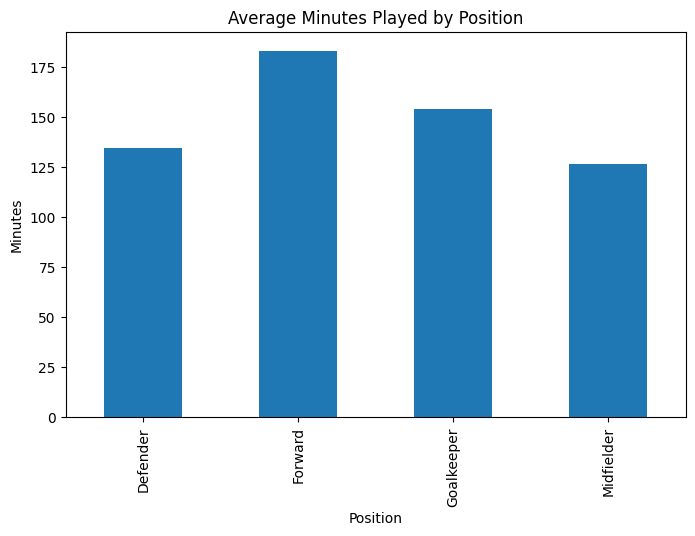

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_positions.plot(kind='bar')
plt.title('Average Minutes Played by Position')
plt.ylabel('Minutes')
plt.xlabel('Position')
plt.show()

Bu qrafik La Liqa komandalarındakı futbolçuların mövqelərinə görə ortalama oyun dəqiqələrini göstərir.
Məlumatdan göründüyü kimi, hücumçular (Forward) ən çox, müdafiəçilər (Defender) isə daha az orta dəqiqə oynayıb. Qapıçılar (Goalkeeper) və yarımmüdafiəçilər (Midfielder) isə orta səviyyədə oynayıblar. Bu, komandaların mövqe üzrə oyun strategiyasını əks etdirir.

LaLiga Team Goal Analysis
“Bu layihənin məqsədi LaLiga komandalarının hücum effektivliyini həm toplam qollar, həm də oyun başına qollar əsasında müqayisə etməkdir.”

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Bu layihədə istifadə olunan Python kitabxanaları:

pandas – məlumatların işlənməsi və analizi üçün

seaborn – gözəl statistik qrafiklər üçün

matplotlib – qrafiklərin tənzimlənməsi və göstərilməsi üçün

In [ ]:
laliga = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/laliga.csv')

LaLiga datasetini CSV faylından oxuyub Pandas DataFrame şəklində analiz üçün yükləyir.

In [ ]:
laliga = laliga[laliga['Games played'] > 0]

Oyun keçirməyən oyunçuları çıxarırıq ki, sonrakı hesablamalarda sıfıra bölmə problemi yaranmasın.

In [ ]:
team_goals = laliga.groupby('Team')['Goals scored'].sum().sort_values(ascending=False)

Hər komandanın toplam qol sayını hesablayır və ən çoxdan ən aza doğru sıralayır.

In [ ]:
team_goals =team_goals.reset_index()

Qruplaşdırılmış Series-i DataFrame-ə çevirmək üçün indeksi sıfırlayır.

In [ ]:
team_goals.rename(columns={'Goals scored': 'Total Goals'},inplace=True)

Sütun adını daha oxunaqlı etmək üçün 'Goals scored' → 'Total Goals' olaraq dəyişir.


In [84]:
team_goals.head(7)

,Team,Total Goals
0,FC Barcelona,87
1,Real Madrid,61
2,Sevilla FC,60
3,Levante UD,55
4,Atlético de Madrid,53
5,RC Celta,52
6,Valencia CF,52


DataFrame-in ilk 5 sətrini göstərir və komandaların toplam qollarını önizləməyə imkan verir.

/tmp/ipython-input-2983768651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_goals,x='Team',y='Total Goals',palette='viridis')


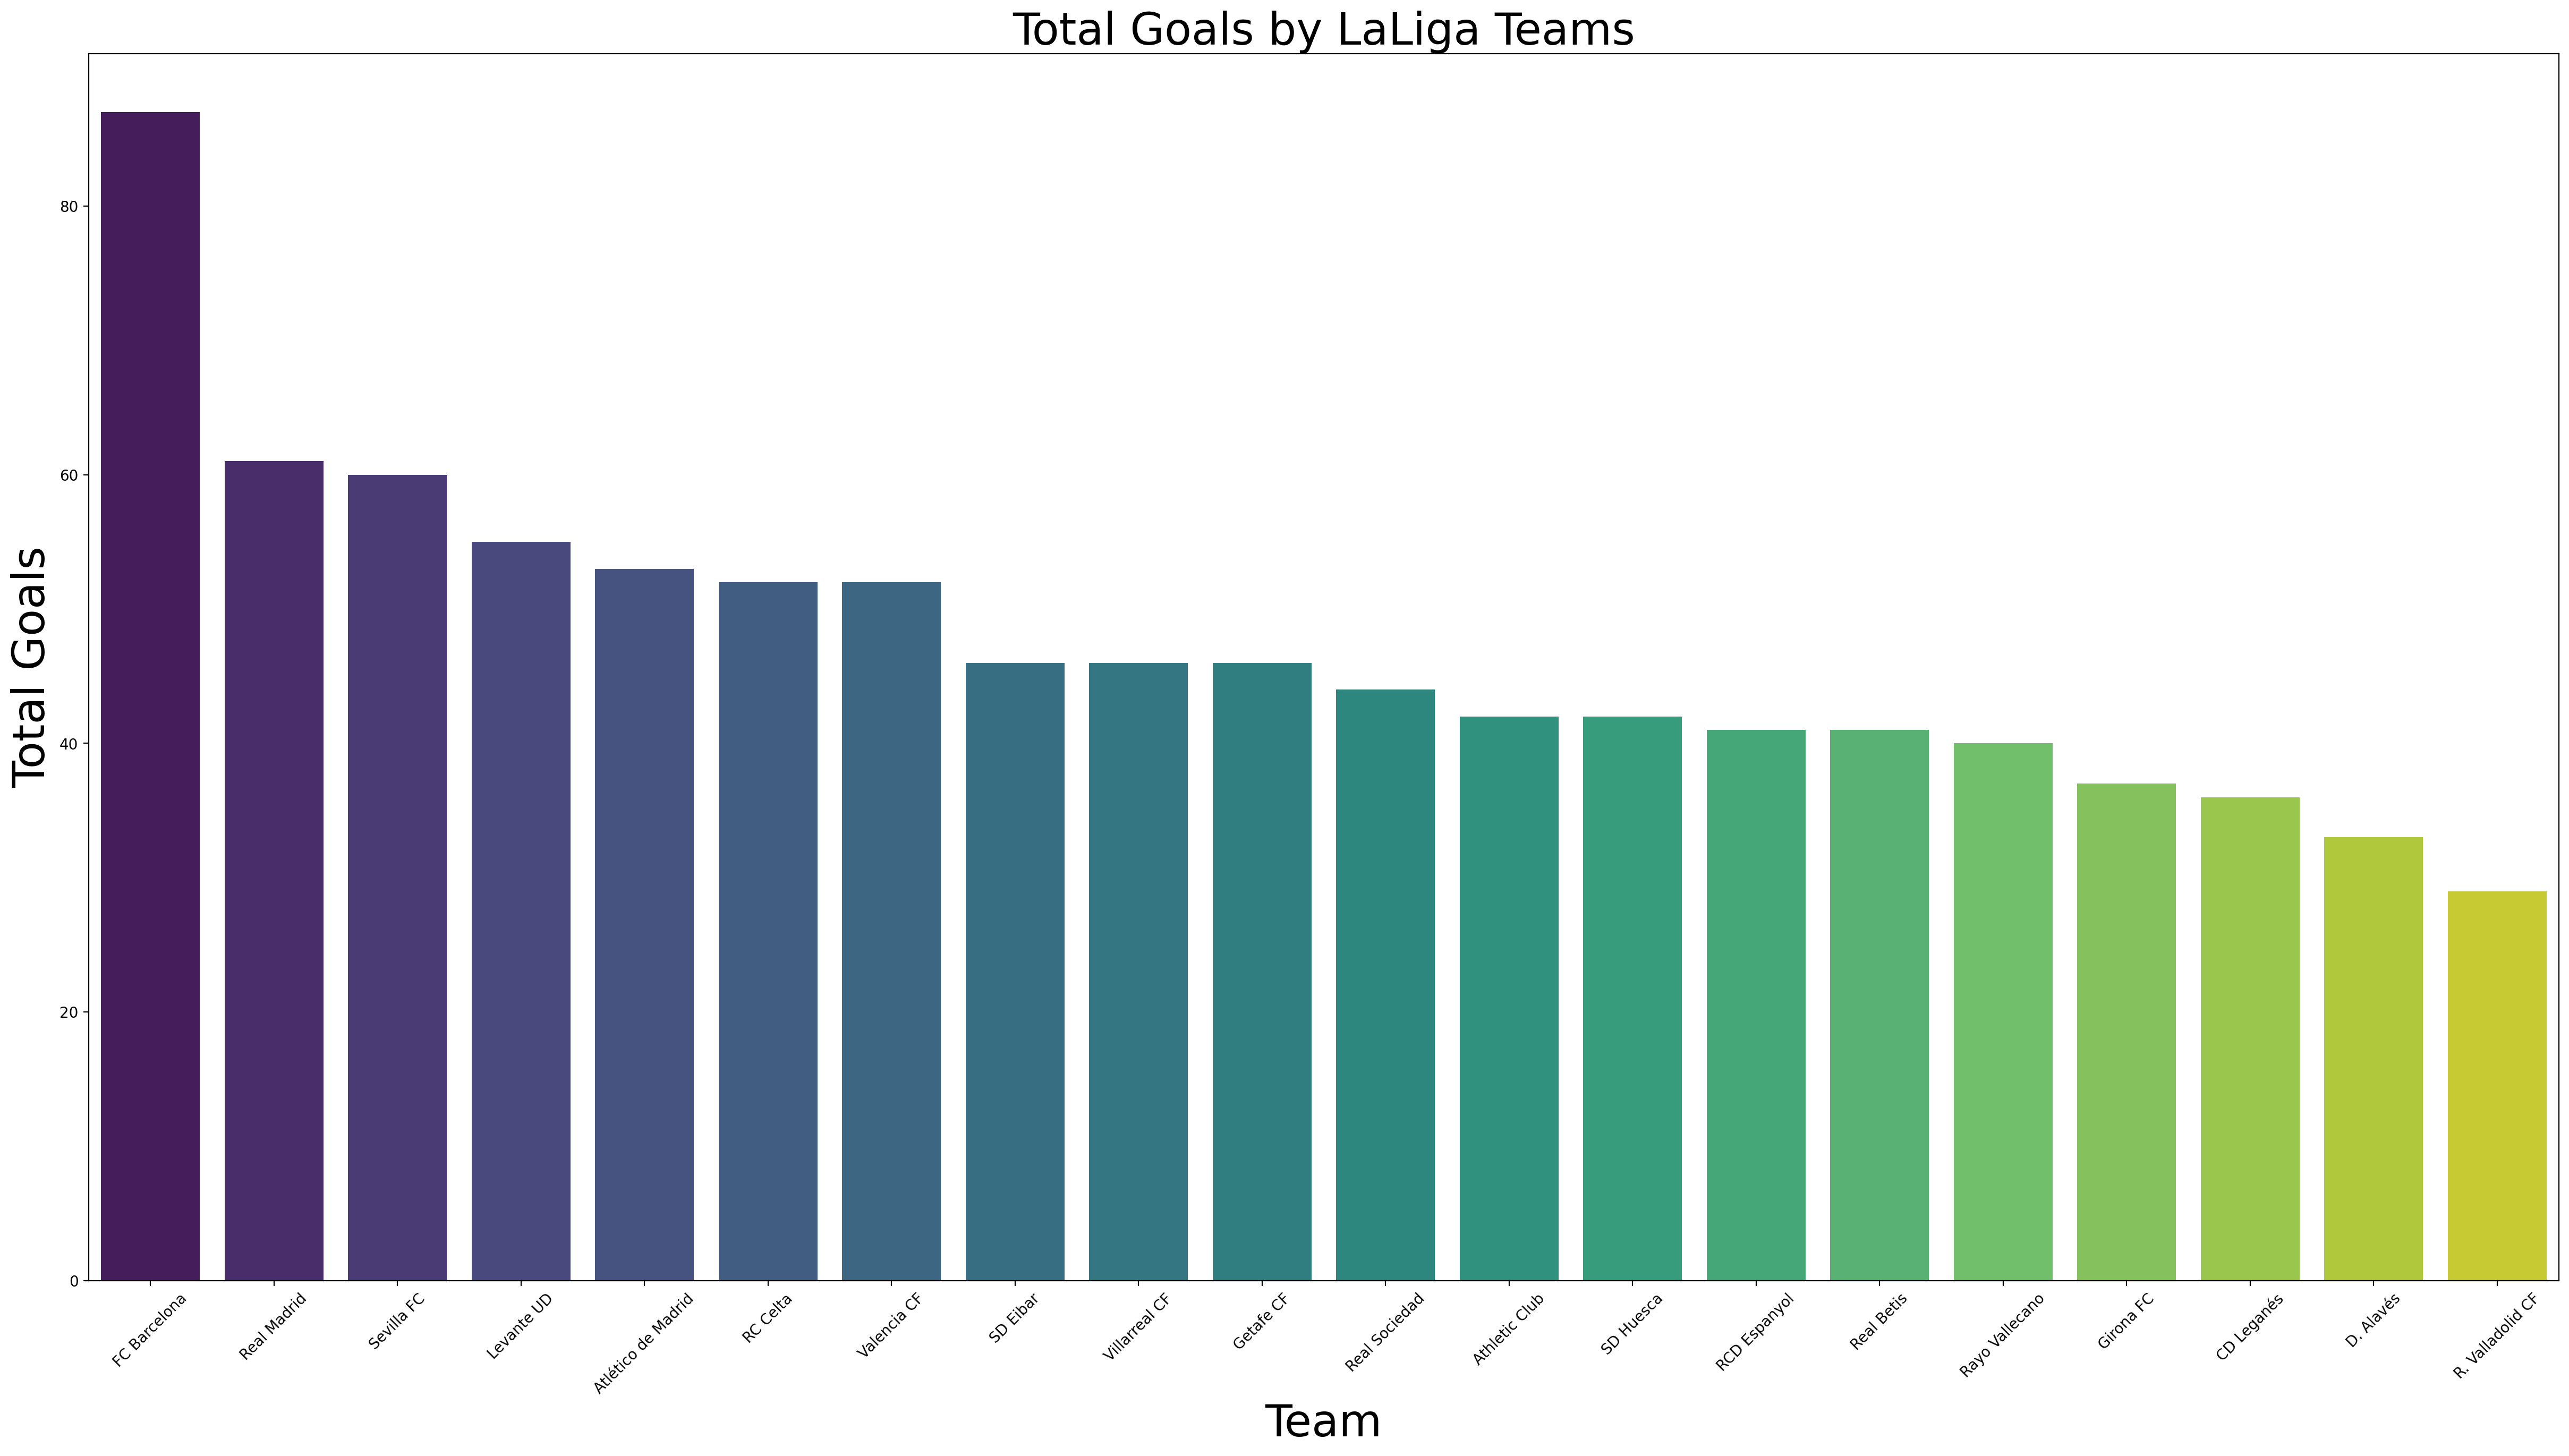

In [ ]:
plt.figure(figsize=(30,15),dpi=200)
sns.barplot(data=team_goals,x='Team',y='Total Goals',palette='viridis')
plt.title('Total Goals by LaLiga Teams',fontsize= 30)
plt.xlabel('Team', fontsize=30)
plt.ylabel('Total Goals', fontsize=30)
plt.xticks(rotation=45)
plt.show()

Seaborn və Matplotlib ilə LaLiga komandalarının toplam qollarını bar qrafikdə göstərir, qrafikin ölçüsünü, etiketləri və x-oxundakı adların oxunaqlığını tənzimləyir.

/tmp/ipython-input-1069579113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_avg_goals, x='Team', y='goals_per_game', palette='coolwarm')


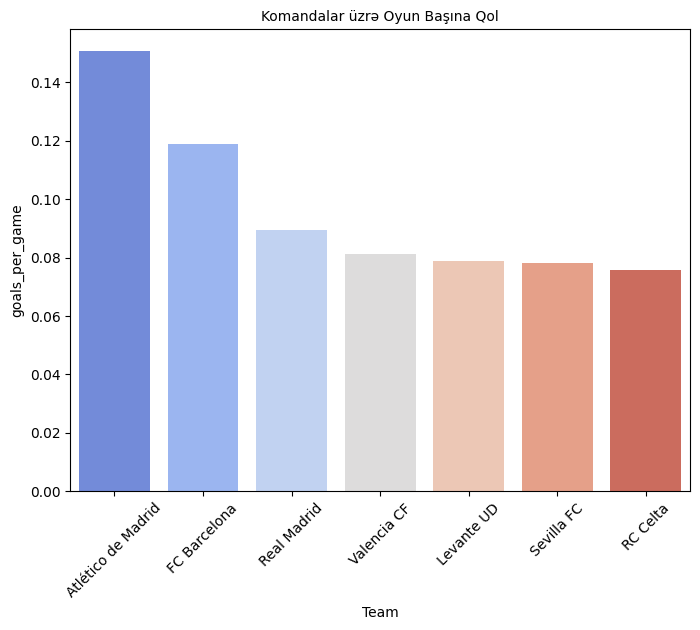

In [91]:
laliga['goals_per_game'] = laliga['Goals scored'] / laliga['Games played']
team_avg_goals = laliga.groupby('Team')['goals_per_game'].mean().sort_values(ascending=False).head(7).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(data=team_avg_goals, x='Team', y='goals_per_game', palette='coolwarm')
plt.title('Komandalar üzrə Oyun Başına Qol', fontsize=10)
plt.xlabel('Team', fontsize=10)
plt.ylabel ('goals_per_game',fontsize=10)
plt.xticks(rotation=45)
plt.show()

Bu vizuallaşdırma ilk 7 LaLiga komandalarının oyun başına orta qol göstəricisini təqdim edir. Analiz göstərir ki, bəzi komandalar daha az oyunçu ilə daha yüksək hücum məhsuldarlığına malikdir. Bu da komandaların hücum strategiyalarındakı fərqləri üzə çıxarır.